# Spam/Ham Email Classification Using Neural Network and Naive Bayes
## About this Dataset

This dataset is a spam/ham email datatset and has two label/categories/features and has two columns which are Category and Message.

'Spam' indicates that the email is classified as spam, it is an unsolicited messages.
'Ham' denotes that the email is legitimate (ham).
and the last column contains the actual content of the email messages.

Spam/Ham Email Dataset is a secondary data found on Kaggle Dataset 

In [ ]:
#!pip install wordcloud

In [1]:
!pip install joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# This is used to read the dataset in a pandas dataframe and into the notebook
df_spam_ham = pd.read_csv('spam_ham_email.csv')

## Data Cleaning and Exploration of the Dataset

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset

Data Exploration is a technique used to understand the various aspect of your dataset including the visualization and statistcial evaluation of the dataset to be able to summarize the characteristics and uniqueness of the dataset

In [3]:
    ### This is to read the read the first 5 rows in your dataset...
    df_spam_ham.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#The loc[0] is used to locate the row with the index [0] which is the first row in the dataset

print(df_spam_ham.loc[0])

#The result shows that it is a ham email content by category and the display message...

Category                                                  ham
Message     Go until jurong point, crazy.. Available only ...
Name: 0, dtype: object


In [5]:
#This is used to view the last 5 rows in the dataset.
df_spam_ham.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
#This is used to get an overview information about the dataset
df_spam_ham.info()

#This results shows that the dataset has 5572 rows with no missing values and having two columns(Category and Message).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Data Cleaning

In [8]:
df_spam_ham.isna() #This is used to verify/check if there is a missing value
#The result shows there is no missing values in the dataset.

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [9]:
df_spam_ham.isna().sum() #This shows that there is no missing values in the dataset

Category    0
Message     0
dtype: int64

In [10]:
df_spam_ham.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [11]:
df_spam_ham.duplicated().sum() #This is used to check the number of duplicates in the dataset and the results bring 415 duplicates.

415

In [12]:
df_spam_ham.drop_duplicates(inplace=True) #This is used to handle the duplicates and
#the 'inplace=True' is used to make sure that the method does NOT return a new DataFrame,
#but it will remove all duplicates from the original DataFrame.

In [13]:
#Check to verify if the duplicates has been removed and now the count of the dataset after duplicates removal.
df_spam_ham.duplicated().sum()

0

In [14]:
df_spam_ham.count() #This shows the new count of the dataset after the duplicates has been removed.

Category    5157
Message     5157
dtype: int64

### Exploratory Data Analysis

This will be done using the normal 

In [36]:
#WORDCLOUD VISUAL
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
# Combine all messages for each category
spam_email_messages = ' '.join(df_spam_ham[df_spam_ham['Category'] == 'spam']['Message'])
ham_email_messages = ' '.join(df_spam_ham[df_spam_ham['Category'] == 'ham']['Message'])

In [53]:
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=1000, height=600, background_color='black', stopwords=set(stopwords.words('english'))).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

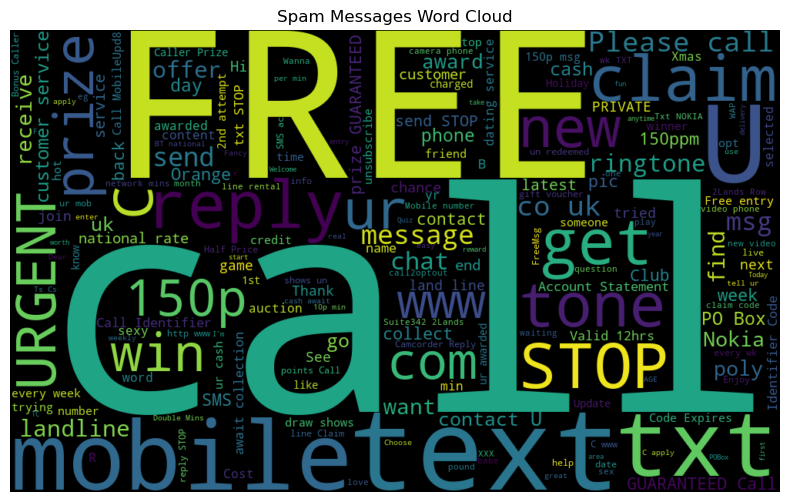

In [54]:
# Generating word cloud for 'spam' messages
generate_wordcloud(spam_email_messages, 'Spam Messages Word Cloud')
# The results/visual shows that the messages categorised as spam mostly contain messages with Free, Call, Text, reply, urgent, get, win amd

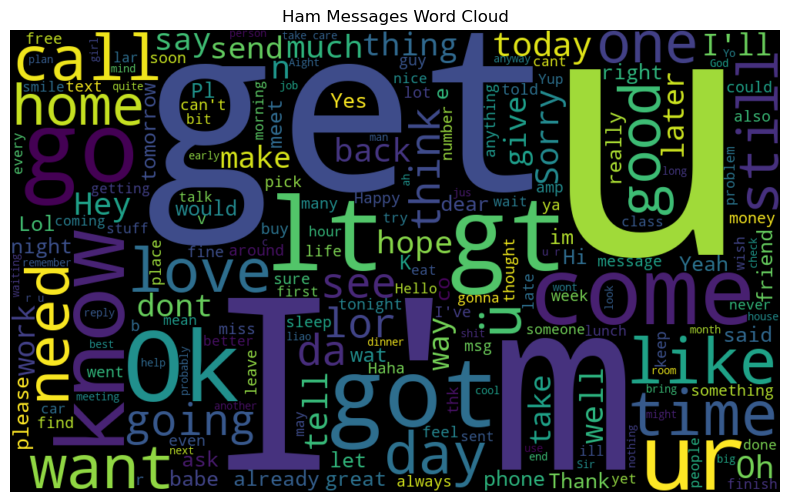

In [55]:
# Generating word cloud for 'ham' messages
generate_wordcloud(ham_email_messages, 'Ham Messages Word Cloud')
#The visual shows that get, U, I'm, know, ok, got, ur, are msotly used seen in the messages categorized as a Ham messages

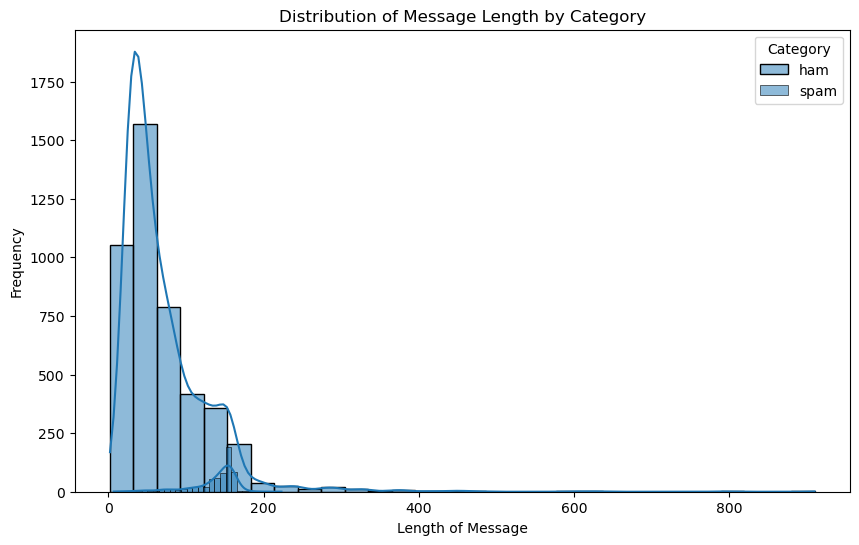

In [27]:
#Histrogram
# Making a numerical column 'Length' in each 'Category'
plt.figure(figsize=(10, 6))
df_spam_ham['Length'] = df_spam_ham['Message'].apply(len)  
for category in df_spam_ham['Category'].unique():
    sns.histplot(df_spam_ham[df_spam_ham['Category'] == category]['Length'], label=category, kde=True, bins=30)

plt.title('Distribution of Message Length by Category')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.show()


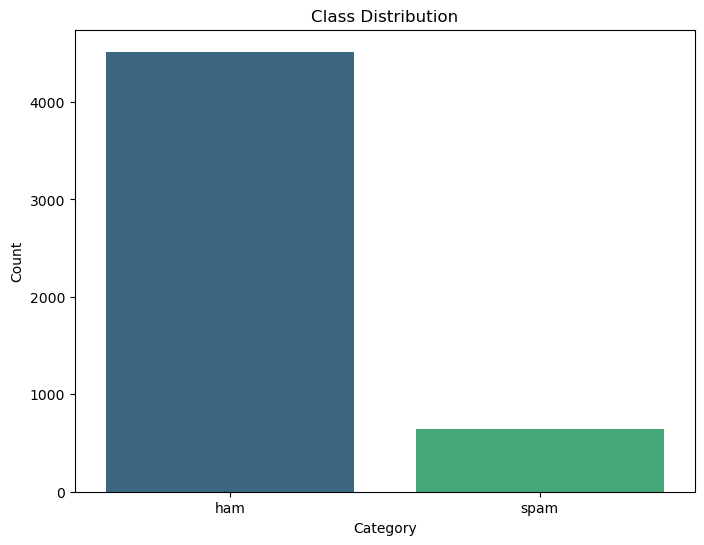

In [28]:
#Barplot provide a clear visual comparison of the counts of each category.

plt.figure(figsize=(8, 6))
category_counts = df_spam_ham['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


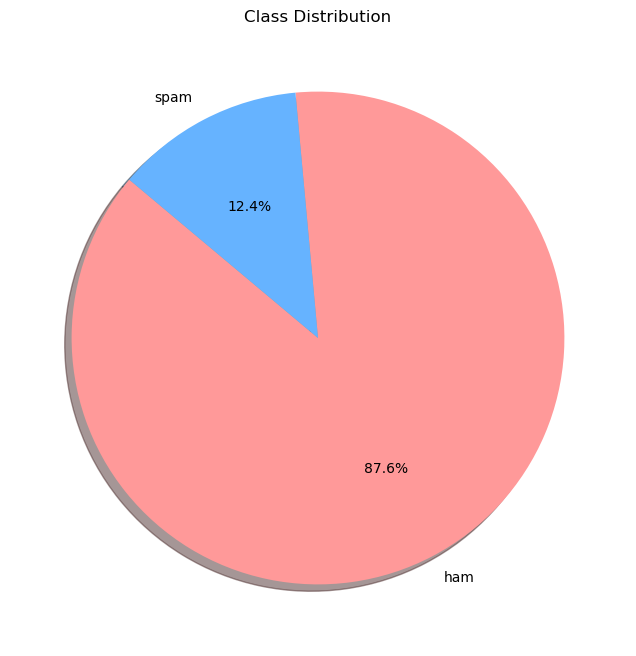

In [29]:
#Piechart shows the proportion of each category in the dataset.

plt.figure(figsize=(8, 8))
df_spam_ham['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], shadow=True)
plt.title('Class Distribution')
plt.ylabel('')  # This hides the y-label
plt.show()


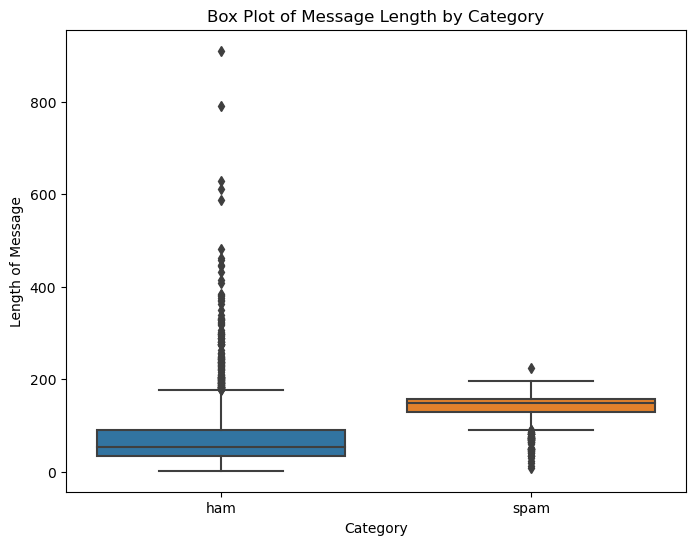

In [30]:
#Boxplot is useful for visualizing the distribution of numerical data and identifying outliers.
plt.figure(figsize=(8, 6))
df_spam_ham['Length'] = df_spam_ham['Message'].apply(len) 
sns.boxplot(x='Category', y='Length', data=df_spam_ham)
plt.title('Box Plot of Message Length by Category')
plt.xlabel('Category')
plt.ylabel('Length of Message')
plt.show()


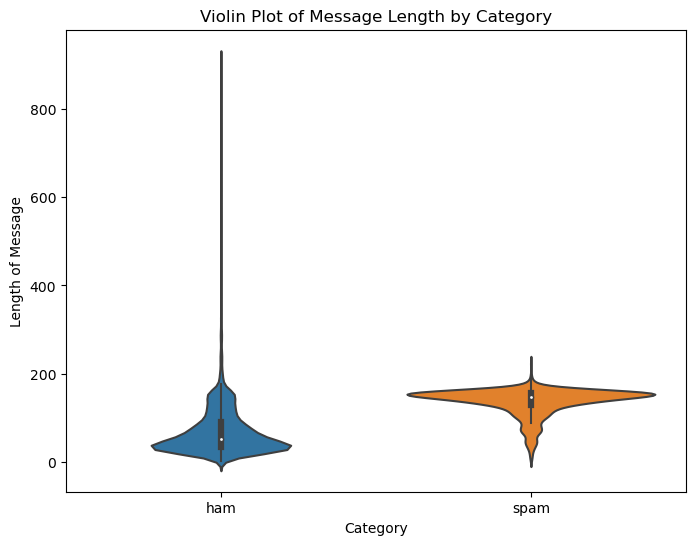

In [26]:
#Violin plot provide a visual representation of the distribution of the data across different categories, 
#combining features of box plots and histograms.

plt.figure(figsize=(8, 6))
df_spam_ham['Length'] = df_spam_ham['Message'].apply(len)  # Assuming 'Message' column exists
sns.violinplot(x='Category', y='Length', data=df_spam_ham)
plt.title('Violin Plot of Message Length by Category')
plt.xlabel('Category')
plt.ylabel('Length of Message')
plt.show()


### OVERALL EXPLANATION OF THE VISUALIZATION: 

1. From the above Visualization, it shows that the spam messages are more than the ham messages which shows an 'IMBALANCE DATASET'

2. The effect of an imbalance dataset is that it can lead to inaccuracy predictions, biasness of models builts and poor generalization.
3. The histogram, boxplot and violin plots shows that the length of the messages by its category are majorly between 0 t0 200.

To handle this imbalance dataset, there are various techiques that can be used which includes; Resampling (Oversampling and Undersampling), SMOTE, BalancedBagging Classifier and many more. However, SMOTE will be utilized in this Project

### SMOTE: Synthetic Minority Over-Sampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.
However, before SMOTE can be used, since the classification column is a string/text, it needs to be converted into a numerical entity so that the models can better under data because the language models/computer understands are 0 and 1 (Numerical) therefore, Vectorizing the dataset is important

### Vectorization
Vectorization in Natural Language Processing (NLP) is a method used to convert text data into a numerical representation that Machine Learning algorithms can understand and process. They also acts a feature extraction and a dimensionality reduction methods.


In [56]:
# Vectorization
cvect = CountVectorizer()
a = df_spam_ham['Message']
b = df_spam_ham['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Converting labels/classication column/features to binary values
a_vectorized = cvect.fit_transform(a)

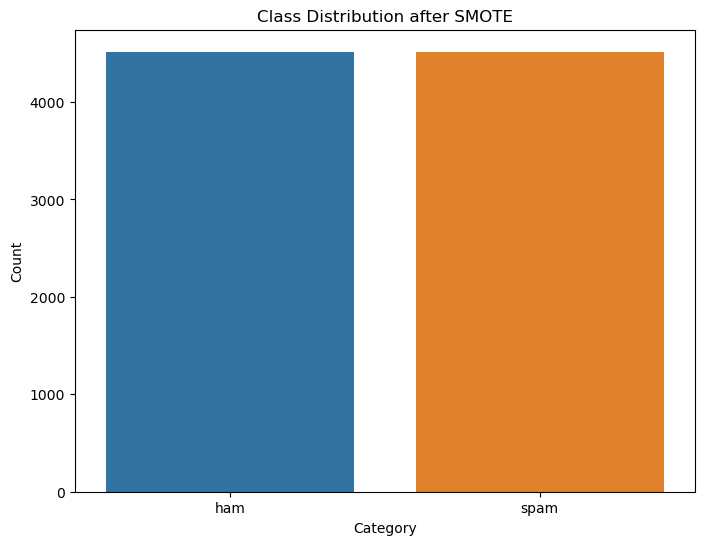

In [62]:
#Applying SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12345) #This is used to set the reproducibility of results. 
a_resampled, b_resampled = sm.fit_resample(a_vectorized, b)

# Plotting the class distribution after Smote has been applied to the dataset.
plt.figure(figsize=(8, 6))
sns.countplot(x=b_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'])  # Assuming 0 corresponds to 'ham' and 1 corresponds to 'spam'
plt.show()


#### Now, using the smote we have syntheticall balanced dataset.... We can now move to training our neural network model. 

### Model Building using Neural Network

In [63]:
#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(a_resampled, b_resampled, test_size= 0.3, random_state=123)
#I'm splitting the dataset into 70 train & 30 test dataset...

In [66]:
# Counting the number of samples in each split.
train_count = x_train.shape[0]  # Number of rows in the training set
test_count = x_test.shape[0]    # Number of rows in the testing set

print(f'Number of samples in the training set: {train_count}')
print(f'Number of samples in the testing set: {test_count}')


### x_train and x_test are likely sparse matrices resulting from the CountVectorizer transformation.
### In this case, len() cannot be directly applied to sparse matrices. Instead, you should use the shape attribute, 
### which provides the dimensions of the matrix. Specifically, shape[0] gives the number of rows (samples) in the sparse matrix.

Number of samples in the training set: 6322
Number of samples in the testing set: 2710


In [67]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# Creating the model
model = Sequential()

# Input layer with Batch Normalization
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layer with more neurons and Batch Normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Additional hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

In [68]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1114880   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

Epoch 1/10
198/198 [==============================] - 2s 11ms/step - loss: 0.4647 - accuracy: 0.7749 - val_loss: 0.4404 - val_accuracy: 0.8125
Epoch 2/10
198/198 [==============================] - 2s 9ms/step - loss: 0.1753 - accuracy: 0.9389 - val_loss: 0.1377 - val_accuracy: 0.9808
Epoch 3/10
198/198 [==============================] - 2s 9ms/step - loss: 0.1131 - accuracy: 0.9643 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 4/10
198/198 [==============================] - 2s 9ms/step - loss: 0.0787 - accuracy: 0.9758 - val_loss: 0.0693 - val_accuracy: 0.9782
Epoch 5/10
198/198 [==============================] - 2s 9ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0590 - val_accuracy: 0.9812
Epoch 6/10
198/198 [==============================] - 2s 9ms/step - loss: 0.0645 - accuracy: 0.9809 - val_loss: 0.0679 - val_accuracy: 0.9801
Epoch 7/10
198/198 [==============================] - 2s 9ms/step - loss: 0.0489 - accuracy: 0.9861 - val_loss: 0.0768 - val_accuracy: 0.9756
Epoch

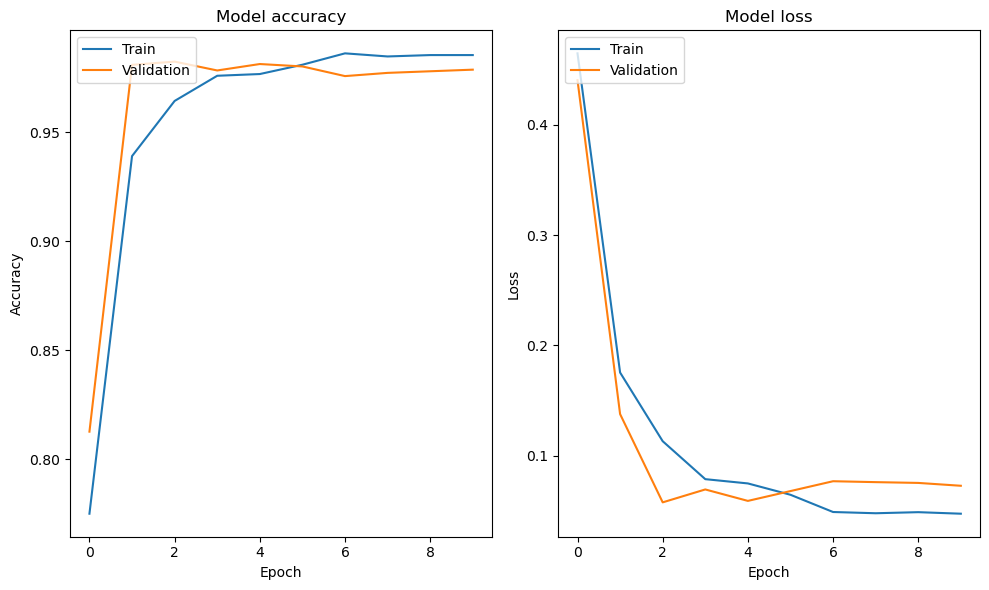

In [71]:
# Convert sparse matrices to dense format
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

# Train the model
history = model.fit(x_train_dense, y_train, epochs=10, batch_size=32, validation_data=(x_test_dense, y_test), verbose=1)

plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

85/85 [==============================] - 0s 3ms/step
Accuracy: 0.9786
Precision: 0.9681
Recall: 0.9896
F1 score: 0.9787


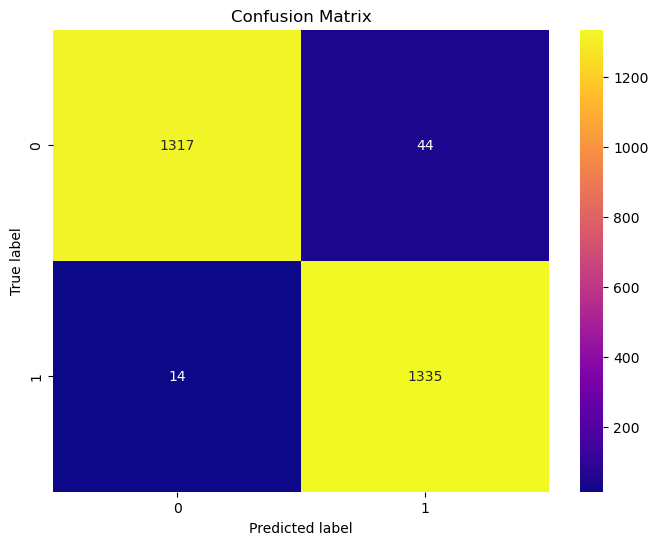

In [73]:
# Evaluate the model
y_pred_prob = model.predict(x_test_dense)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}') 


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="plasma", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# Save the CountVectorizer to disk
vectorizer_filename = 'count_vectorizer.pkl'
joblib.dump(cvect, vectorizer_filename)
# Save the trained model to disk
model_filename = 'spam_ham_classifier_model.h5'
model.save(model_filename)

## Model Building using a Traditional Machine Learning Model (Naives Bayes)

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(a_resampled, b_resampled, test_size= 0.3, random_state=123)
#I'm splitting the dataset into 70 train & 30 test dataset...

In [82]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)


MultinomialNB()

In [83]:
# Predict on the test set
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Accuracy: 0.9727
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.98      0.97      1361
        spam       0.98      0.96      0.97      1349

    accuracy                           0.97      2710
   macro avg       0.97      0.97      0.97      2710
weighted avg       0.97      0.97      0.97      2710



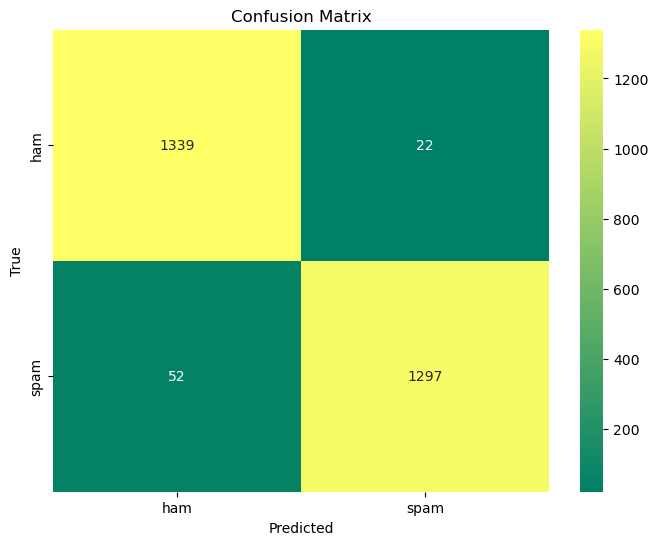

In [87]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='summer', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [113]:
import pickle

# Save the trained Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(nb_classifier, model_file)

# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cvect, vectorizer_file)

### Testing the Classifier with a New Message 

In [88]:
# New message to classify
new = "Congratulations! You've won a $1000 gift card. Call now to claim your prize."

In [ ]:
# Vectorize the new message using the same vectorizer
new_vec = cvect.transform([new])

In [91]:
# Predict the category using the trained model
prediction = nb_classifier.predict(new_vec)

In [92]:
# Map the prediction to the corresponding label
label = 'spam' if prediction[0] == 1 else 'ham'

In [94]:
print(f'The message: "{new}"\nIs classified as: {label}')

The message: "Congratulations! You've won a $1000 gift card. Call now to claim your prize."
Is classified as: spam


### Testing the Classifier with One of Messages from the same dataset

In [105]:
new_2 = 'Even my brother is not like to speak with me. They treat me like aids patent.'

In [106]:
new_vec_2 = cvect.transform([new_2])

In [107]:
# Predict the category using the trained model
prediction_2 = nb_classifier.predict(new_vec_2)

In [108]:
# Map the prediction to the corresponding label
label_2 = 'spam' if prediction_2[0] == 1 else 'ham'

In [110]:
print(f'The message: "{new_2}"\nIs classified as: {label_2}')

The message: "Even my brother is not like to speak with me. They treat me like aids patent."
Is classified as: ham
